## Exploratory Data Analysis Project


Table of Contents :
1. [Introduction](#section-one)
2. [Retrieving Data](#section-two)
3. [Data Cleaning](#section-three)
4. [Feature Engineering](#section-four)
5. [Summary](#section-six)

<a id="#section-one"></a>
# 1. Introduction
In this project, I will use a dataset from a survey held by NHANES in 2015-2016. I collected the dataset from kaggle. I will conduct descriptive and diagnostic analysis with the aim to collect and compare data of BMI in different age group and gender.

This dataset consists of 28 columns and 5735 rows. Among 28 columns, I isolated some columns which are related to my analysis.

Brief explanation of the column :

* SEQN = Respondent sequence number (
* SMQ020 = Smoking
* RIAGENDR = Gender
* RIDAGEYR = Age (years)
* DMDEDUC2 = Education level
* BMXWT  = Weight (kg)
* BMXHT = Height (cm)
* BMXBMI = BMI

<a id="#section-two"></a>
# 2. Retrieving Data

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

path = "NHANES.csv"
da = pd.read_csv(path)

In [38]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
da.shape

(5735, 28)

In [4]:
# Isolate the column
data = da.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


Is there any data types which are unsuitable?

In [6]:
# Change the column names to ease the use
data.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']

In [7]:
data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [ ]:
data.shape

(5735, 8)

**Result** : dataset with 5735 rows and 8 columns. The dataset contains 3 columns with categorical data and 4 column with numerical data.
* Categorical = smoking, gender, education
* Numerical = age, weight, height, bmi

<a id="#section-three"></a>
# 3. Data Cleaning

Steps I will use in data cleaning :

1. Check for duplicate or unnecessary data
2.Check for null values or missing data
3. Check for outliers


#### 3.1 Check duplicates or unnecessary data

In [8]:
# Check for duplicates
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,seqn,smoking,gender,age,education,weight,height,bmi


There is no duplicate data in this dataset, so I will can drop the 'seqn' column because every row contains unique data so it doesn't give much explanation about the data.

In [9]:
data.drop(columns = 'seqn', inplace = True)

In [10]:
data.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


#### 3.2 Check for missing values and handle them

In [11]:
# Check for missing data
data.isnull().sum()

,0
smoking,0
gender,0
age,0
education,261
weight,69
height,62
bmi,73


I have missing values in column education, weight, height, and bmi. For education, I think it is better to drop them because filling the missed value might mislead the real data. For weight, height and bmi, I will drop them too because the number of missing values are very small compared to the dataset (>5000 rows).

In [12]:
# Dataset before handling missing values
data.shape

(5735, 7)

In [13]:
# Drop the missing values
data.dropna(inplace = True)

In [14]:
#Dataset after missing values are dropped
data.shape

(5406, 7)

#### 3.3 Find outliers and handle outliers

I have three numerical data (weight, height and bmi), so I will try to find outliers from these columns using histogram and boxplot.

In [15]:
# Descriptive analysis of numerical data
numerical = ['age','weight','height','bmi']
data[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


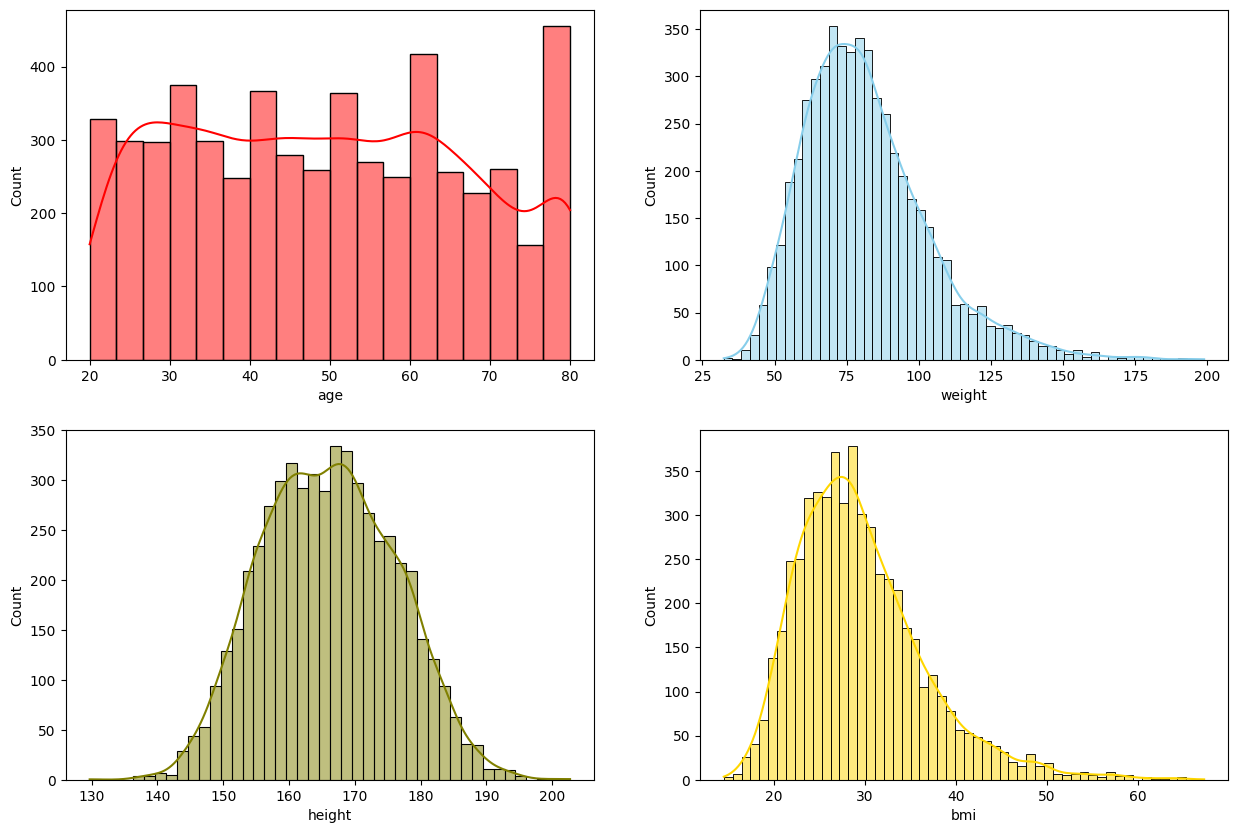

In [16]:
# Create histogram for numerical variable
fig, axs = plt.subplots(2,2, figsize=(15, 10))

sns.histplot(data= data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])

plt.show()

From histograms, I observe that height has a normal distribution curve while weight and bmi have a bit of right-skewed distribution.

<Axes: ylabel='bmi'>

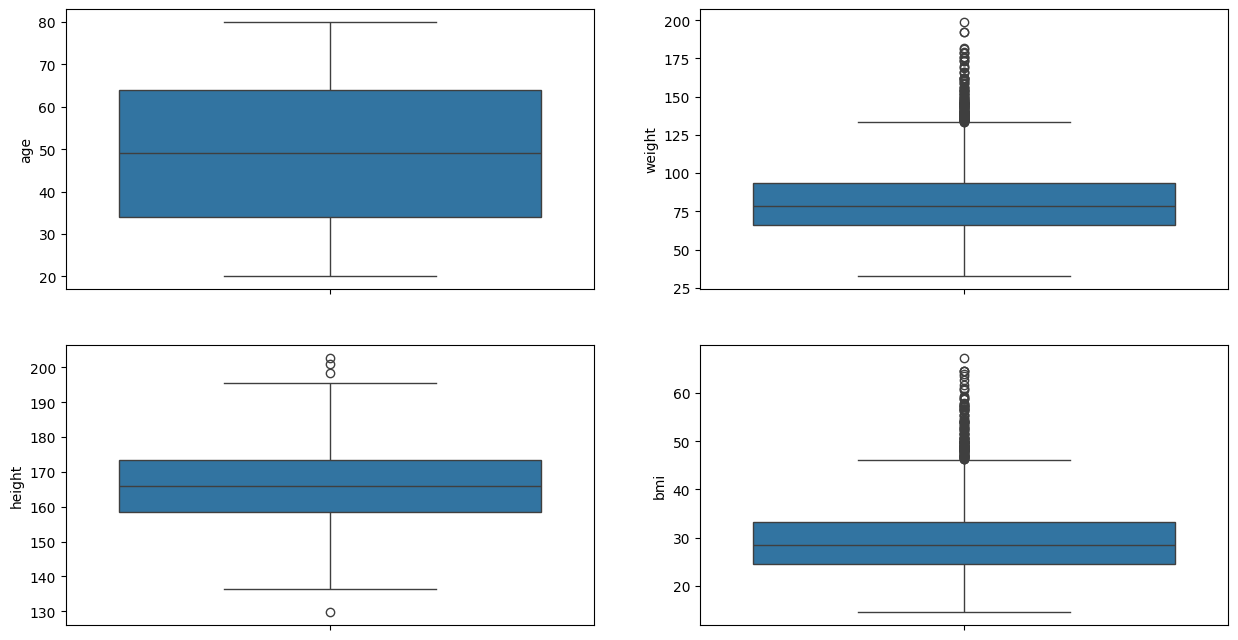

In [17]:
# Create boxplot to observe distribution of numerical value
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['age'], ax = axs[0,0])
sns.boxplot(data['weight'], ax = axs[0,1])
sns.boxplot(data['height'], ax = axs[1,0])
sns.boxplot(data['bmi'], ax = axs[1,1])

According to the boxplots, age variable has no outliers. Height has normal distribution with few outliers. Meanwhile, weight and bmi have more outliers in the upper values.

Based on the observation of histogram and boxplot, I decided the outliers to be outside of minimum and maximum value for height. Meanwhile for weight and BMI, I will consider value more than maximum as outliers.

In [18]:
# Height
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]

In [19]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [20]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

In [21]:
# Look at the data after removing outliers
data.shape

(5252, 7)

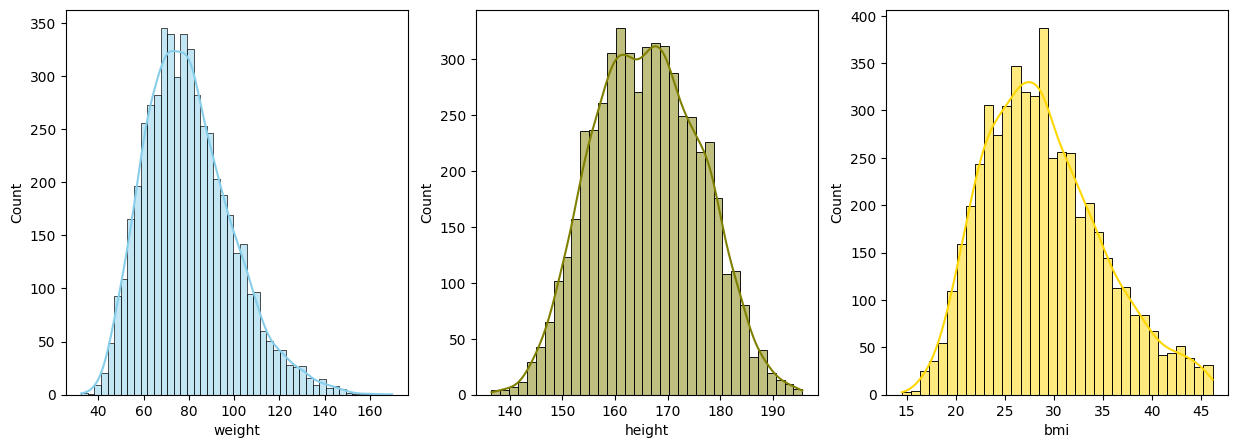

In [22]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

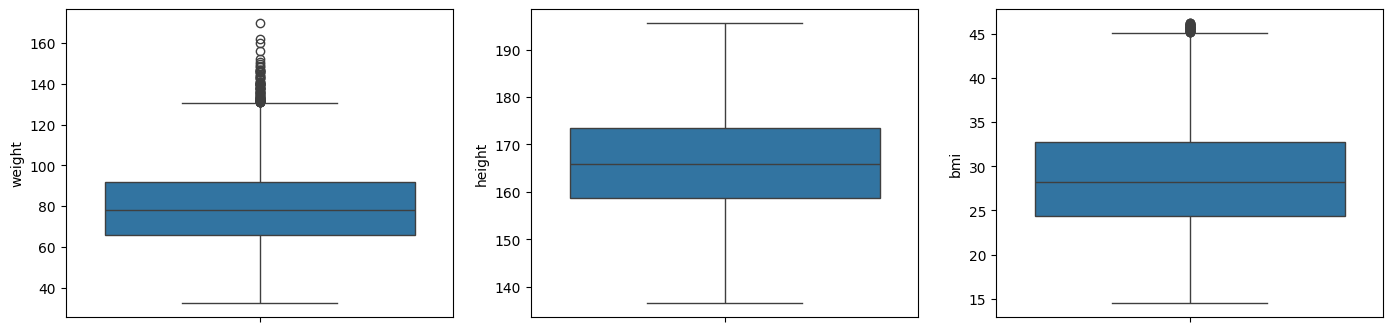

In [23]:
# Check distribution using boxplot after removing outliers

fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data['weight'], ax = axs[0])
sns.boxplot(data['height'], ax = axs[1])
sns.boxplot(data['bmi'], ax = axs[2])

plt.show()

**Result** : the numerical values have been removed from outliers, the result is data with normal distribution.

<a id="#section-four"></a>
# 4. Feature Engineering
1. One hot encoding for categorical data
2. Log transform of skewed variables

#### 4.1 One hot encoding for categorical data

Since the categorical data have been in a type of int or float, I would translate them to object data type to make tho encoding easier.

In [24]:
# smoking
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender
data['gender'] = data.gender.replace({1 : 'male', 2 : 'female'})

#education
data['education'] = data.education.replace({1 : '<9th grade', 2 : '9-11th grade',
                                           3 : 'HS or GED', 4 : 'Some college / AA',
                                           5 : 'College or above', 7 : 'Other',
                                           8 : 'Other'})

In [25]:
# Get the categorical data
categorical = data[['smoking','gender','education']]
categorical.head()

,smoking,gender,education
0,yes,male,College or above
1,yes,male,HS or GED
2,yes,male,HS or GED
3,no,female,College or above
4,no,female,Some college / AA


In [26]:
# Get dummies for categorical data
dummy = pd.get_dummies(categorical,drop_first=True)
dummy

,smoking_yes,gender_male,education_9-11th grade,education_<9th grade,education_College or above,education_HS or GED,education_Some college / AA
0,True,True,False,False,True,False,False
1,True,True,False,False,False,True,False
2,True,True,False,False,False,True,False
3,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
5730,True,False,False,False,False,True,False
5731,False,True,False,False,True,False,False
5732,True,False,False,False,False,False,True
5733,True,True,False,True,False,False,False


#### 4.2 Log transform of skewed variables

In [27]:
# Check the skewness of numerical variables
numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75
skew_vals = numerical.skew()
skew_vals

,0
age,0.107088
weight,0.653454
height,0.077404
bmi,0.520106


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<a id="#section-six"></a>
# 5. Summary

In summary, the dataset I use here relatively friendly and did not need too much intervention for data cleaning because it has no duplicated data and small number of missing values. Besides, the data are also large enough to analyse for various purpose. The distribution of data I used for BMI analysis are also mostly normally distributed or slightly-skewed which make it suitable for modelling.

For further analysis and more accurate modelling, I would encourage to use more variables in the dataset to find more variables which are probably correlated with BMI. There are also some potential that these variables I did not use here were probably skewed and needed more feature engineering process.


